# Getting Subtypes and Primary Diseases

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
import networkx as nx
from scipy.stats import hypergeom

In [2]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")
#effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
#dep = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_dependencyQ1.csv")
#dep = dep.rename(columns={'Unnamed: 0': "DepMap_ID"})
#dep = pretty_gene_names(dep)
#effect = pretty_gene_names(effect)
#data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [28]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [9]:
data = pretty_gene_names(data)

In [10]:
CLines = list(set.intersection(set(data.CCLE_Name.values),set(effect.index.values)))

In [54]:
CLines

['LNZ308',
 'NCIH1975',
 'SMZ1',
 'H103',
 'KYSE150',
 'JHC7',
 'HS578T',
 'GP5D',
 'BICR78',
 'SHI1',
 'FU97',
 'COLO800',
 'ABC1',
 'NCIH526',
 'CII',
 'RPMI8226',
 'TF1',
 'T98G',
 'CCLP1',
 'HARA',
 'BOKU',
 'MUGCHOR1',
 'HLF',
 'LN235',
 'U937',
 'OV7',
 'COLO678',
 'KYSE510',
 'UMUC16',
 'BXPC3',
 'HT',
 'EMTOKA',
 'DB',
 'MELJUSO',
 'SNU387',
 'D341MED',
 'HS294T',
 'SNU410',
 'JHH4',
 'HUCCT1',
 'RCC10RGB',
 'NCIN87',
 'YH13',
 'EWS502',
 'SNUC4',
 'C84',
 'PLCPRF5',
 'HT115',
 'MB1',
 'HKA1',
 'HS852T',
 'KP2',
 'SLR26',
 'HCC827GR5',
 'MM370',
 'COV434',
 'SNU478',
 'HCC1359',
 'KPNYN',
 'TTC642',
 'HKGZCC',
 'NCIH322',
 'DAOY',
 'ECGI10',
 'SKOV3',
 'NP5',
 'CHP212',
 'RVH421',
 'TOV21G',
 'VMRCRCW',
 'PANC1',
 'SF268',
 'C33A',
 'UMUC9',
 'WM1799',
 'ONCODG1',
 'SUM159PT',
 'SKMEL19',
 'KKU100',
 'CCLFPEDS0008T',
 'OE21',
 'HCC1937',
 'JHH7',
 'HCC1806',
 'KMCH1',
 'D458',
 'TUHR4TKB',
 'TO14',
 'KYSE70',
 'OCUG1',
 'MV411',
 'SNU182',
 'NCIH727',
 'G292CLONEA141B1',
 'SW98

In [42]:
#data['Subtype'].values

'Adenocarcinoma, high grade serous'

## Wir haben 21 listen, die abhängig von Identitaet als Onkogen oder Tumorsuppressor gerankt sind. Dann die Ranks der 19 Paare addieren und wieder ordnen.
## Von diesen werden dann die ersten 5 bzw 10 Prozent der daten genommen und subtype/primary disease angeschaut und ein signifikanztest gegen den Rest gemacht.

In [6]:
uli_list = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CCNE1'],['CDK6','CDK4'],['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1'],['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

UL2 = [i for j in uli_list for i in j]
UL2 = set(UL2)
UL2 = list(UL2)

In [7]:
ts_onko_classification = [allGenes[x].sum(skipna=True)/allGenes.shape[0] for x in UL2]

In [ ]:
# now with allGenes instead of effects

In [8]:
mydict = {}
for _ in UL2:
    if allGenes[_].sum(skipna=True)/allGenes.shape[0] > 0:
        mydict[_] = allGenes[_].sort_values(ascending=False)
    else:
        mydict[_] = allGenes[_].sort_values()

## Single Pair

In [29]:
cdk4_list = mydict['CDK4'].index.to_list()
cdk4_df = pd.DataFrame(cdk4_list)

rb1_list = mydict['RB1'].index.to_list()
rb1_df = pd.DataFrame(rb1_list)

In [30]:
ranked_index = {}
for _ in rb1_df.index:
    for j in cdk4_df.index:
        ranked_index[rb1_df.values[_][0] + '__' + cdk4_df.values[j][0]] = _ + j

In [12]:
dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
dataX

[('JHUEM1_ENDOMETRIUM__VCAP_PROSTATE', 0),
 ('JHUEM1_ENDOMETRIUM__MDAMB415_BREAST', 1),
 ('BIN67_OVARY__VCAP_PROSTATE', 1),
 ('JHUEM1_ENDOMETRIUM__NCIH2887_LUNG', 2),
 ('BIN67_OVARY__MDAMB415_BREAST', 2),
 ('SCCOHT1_OVARY__VCAP_PROSTATE', 2),
 ('JHUEM1_ENDOMETRIUM__SNU1544_LARGE_INTESTINE', 3),
 ('BIN67_OVARY__NCIH2887_LUNG', 3),
 ('SCCOHT1_OVARY__MDAMB415_BREAST', 3),
 ('TTC642_SOFT_TISSUE__VCAP_PROSTATE', 3),
 ('JHUEM1_ENDOMETRIUM__HCC1419_BREAST', 4),
 ('BIN67_OVARY__SNU1544_LARGE_INTESTINE', 4),
 ('SCCOHT1_OVARY__NCIH2887_LUNG', 4),
 ('TTC642_SOFT_TISSUE__MDAMB415_BREAST', 4),
 ('TO14_OVARY__VCAP_PROSTATE', 4),
 ('JHUEM1_ENDOMETRIUM__MDAMB453_BREAST', 5),
 ('BIN67_OVARY__HCC1419_BREAST', 5),
 ('SCCOHT1_OVARY__SNU1544_LARGE_INTESTINE', 5),
 ('TTC642_SOFT_TISSUE__NCIH2887_LUNG', 5),
 ('TO14_OVARY__MDAMB415_BREAST', 5),
 ('NCIH2030_LUNG__VCAP_PROSTATE', 5),
 ('JHUEM1_ENDOMETRIUM__RDES_BONE', 6),
 ('BIN67_OVARY__MDAMB453_BREAST', 6),
 ('SCCOHT1_OVARY__HCC1419_BREAST', 6),
 ('TTC642_SOF

In [13]:
ceL = [ x for x in range(0,200) for x in dataX[x][0].split('__')]
ceL = set(ceL)
cel = list(ceL)

In [14]:
ceL

{'BIN67_OVARY',
 'CHLA266_SOFT_TISSUE',
 'COGE352_BONE',
 'DMS53_LUNG',
 'ES2_OVARY',
 'EWS502_BONE',
 'FU97_STOMACH',
 'GCIY_STOMACH',
 'HCC1419_BREAST',
 'HCC2429_LUNG',
 'HEC1_ENDOMETRIUM',
 'HS852T_SKIN',
 'JHUEM1_ENDOMETRIUM',
 'JHUEM7_ENDOMETRIUM',
 'JM1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE',
 'K029AX_SKIN',
 'LS_AUTONOMIC_GANGLIA',
 'MDAMB415_BREAST',
 'MDAMB453_BREAST',
 'MEL290_UVEA',
 'MFE319_ENDOMETRIUM',
 'NCIH1915_LUNG',
 'NCIH2030_LUNG',
 'NCIH2887_LUNG',
 'NCIH3122_LUNG',
 'OCUM1_STOMACH',
 'OVMANA_OVARY',
 'PACADD188_PANCREAS',
 'RDES_BONE',
 'SCCOHT1_OVARY',
 'SNU1544_LARGE_INTESTINE',
 'TO14_OVARY',
 'TTC642_SOFT_TISSUE',
 'UMUC9_URINARY_TRACT',
 'VCAP_PROSTATE',
 'WM88_SKIN'}

## All Pairs

In [9]:
top_cellines = {}

for _ in uli_list:
    a,b = _
    a_list = mydict[a].index.to_list()
    a_df = pd.DataFrame(a_list)

    b_list = mydict[b].index.to_list()
    b_df = pd.DataFrame(b_list)

    ranked_index = {}
    for _ in a_df.index:
        for j in b_df.index:
            ranked_index[a_df.values[_][0] + '_' + b_df.values[j][0]] = _ + j

    dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
    ceL = [ x for x in range(0,200) for x in dataX[x][0].split('_')]
    ceL = set(ceL)
    ceL = list(ceL)
    top_cellines[a + '_' + b] = ceL
    
    # store the result

In [10]:
top_cellines.keys()

dict_keys(['CDK4_RB1', 'CDK4_CDKN2C', 'CDK4_CCND1', 'CDK6_CCND3', 'CDK6_CCNE1', 'CDK6_CDK4', 'CDKN2A_CDKN2B', 'CDKN2A_CCNE1', 'NF2_AMOTL2', 'NF2_KIRREL1', 'NF2_TAOK1', 'NF2_LATS2', 'NF2_PTPN14', 'NF2_PTEN', 'NF2_ABL2', 'NF2_RAC1', 'NF2_CRK', 'NF2_DLG5', 'NF2_PKN2'])

In [16]:
result_celllines = pd.DataFrame.from_dict(top_cellines)
#result_celllineselllines.to_csv('ranked_lists.csv')

ValueError: arrays must all be same length

In [11]:
[ len(x) for x in top_cellines.values() ]

[36, 36, 37, 32, 39, 39, 37, 39, 31, 29, 31, 39, 36, 35, 34, 35, 36, 34, 34]

In [12]:
top_c = {}

for _ in top_cellines.keys():
    top_c[_] = top_cellines[_][0:29]

In [13]:
result_celllines = pd.DataFrame.from_dict(top_c)
result_celllines.to_csv('/home/annerer/Dokumente/ranked_lists')

In [14]:
result_celllines

,CDK4_RB1,CDK4_CDKN2C,CDK4_CCND1,CDK6_CCND3,CDK6_CCNE1,CDK6_CDK4,CDKN2A_CDKN2B,CDKN2A_CCNE1,NF2_AMOTL2,NF2_KIRREL1,NF2_TAOK1,NF2_LATS2,NF2_PTPN14,NF2_PTEN,NF2_ABL2,NF2_RAC1,NF2_CRK,NF2_DLG5,NF2_PKN2
0,FU97,FU97,SNU216,OPM2,SNU182,OPM2,KO52,SNU182,IGR39,JHOS2,ECC2,JHOS4,IGR39,IGR39,IGR39,JHOS2,SNU216,ECC2,IGR39
1,VCAP,VCAP,C32,IGR39,OPM2,IGR39,TE6,KO52,PA1,IGR39,IGR39,IGR39,PA1,OCIAML3,HS939T,IGR39,ECC2,JHOS2,T24
2,RDES,RDES,MELHO,HEL9217,IGR39,FU97,VCAP,TE6,NCIH2030,PA1,SNU1105,CCK81,UOK101,PA1,ICC3,HT1080,JHOS2,IGR39,NCIN87
3,BIN67,EWS502,FU97,KARPAS299,EMTOKA,VCAP,H413,ONCODG1,HCC515,NCIH2030,PA1,SKGI,NCIH2030,NCIH2030,PA1,PA1,IGR39,PA1,SNU449
4,EWS502,COGE352,VCAP,NCIH2023,HEL9217,RDES,SNU398,VCAP,KMRC1,KMRC1,NCIH2030,PA1,MM127,RPMI8226,NCIH2030,NCIH2030,SKMEL2,SUM52PE,PA1
5,NCIH2030,SNU1,RDES,MM1S,ONCODG1,HEL9217,PA1,EMTOKA,SNB75,SNB75,LN235,SUM52PE,KMRC1,KMRC1,LN235,MM127,PA1,UOK101,NCIH2030
6,COGE352,LS,WM1799,SHI1,KLE,MM1S,SUM159PT,PA1,LS,OV7,SNU8,NCIH2030,SNB75,ASPC1,KMRC1,KMRC1,NCIH2030,NCIH2030,CAL120
7,K029AX,MDAMB415,EWS502,HSC1,MM1S,EWS502,MSTO211H,KLE,OV7,DKMG,KMRC1,PATU8902,OV7,SNB75,MERO14,SNB75,KMRC1,MM127,HUCCT1
8,SCCOHT1,HCC1419,COGE352,KARPAS422,SNU8,COGE352,RH18DM,SUM159PT,DKMG,YD8,SNB75,KMRC1,HSB2,LS,SNB75,OV7,CAKI1,KMRC1,KMRC1
9,JHUEM7,HEC1,LAN2,COGN305,JHUEM7,HSC1,HOP62,SNU8,YD8,SNU349,OV7,SNU16,DKMG,OV7,U343,DKMG,SNB75,SNU8,SNU8


In [34]:
cdk6_cdk4 = top_cellines['CDK6_CDK4']

## We need to get rid of the celllines that are in DepMap but have no annotation

In [68]:
[data[data['stripped_cell_line_name'].str.match(_)]['Subtype'].values for _ in cdk6_cdk4]
#[data[data['CCLE_Name'].str.match(_)]['primary_disease'].values for _ in depprod]

[array(['Adenocarcinoma'], dtype=object),
 array(['Ductal Adenocarcinoma, exocrine'], dtype=object),
 array([], dtype=object),
 array(['Multiple Myeloma'], dtype=object),
 array(['Diffuse Large B-cell Lymphoma (DLBCL)', 'Glioblastoma'],
       dtype=object),
 array(['Adenocarcinoma'], dtype=object),
 array([], dtype=object),
 array(['Diffuse Large B-cell Lymphoma (DLBCL)'], dtype=object),
 array([], dtype=object),
 array(['Multiple Myeloma'], dtype=object),
 array([], dtype=object),
 array(['Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma'], dtype=object),
 array(['Non-Small Cell Lung Cancer (NSCLC), unspecified'], dtype=object),
 array(['Breast Ductal Carcinoma'], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array(['Acute Myelogenous Leukemia (AML), M6 (Erythroleukemia)'],
       dtype=object),
 array(['Adenocarcinoma, clear cell'], dtype=object),
 array(['Ewings Sarcoma'], dtype=object),
 array([], dtype=object),
 array([], dtype=ob

In [74]:
#[data[data['stripped_cell_line_name'].str.match(_)]['primary_disease'].values for _ in cdk6_cdk4]

boolean_series = data.stripped_cell_line_name.isin(cdk6_cdk4)
cdk6_cdk4_df = data[boolean_series]['primary_disease']

In [82]:
df = pd.DataFrame(cdk6_cdk4_df)

In [16]:
pd.merge(result_celllines[['CDK4_RB1','NF2_CRK']],result_celllines[['NF2_CRK','NF2_AMOTL2']])

,CDK4_RB1,NF2_CRK,NF2_AMOTL2
0,FU97,SNU216,IGR39
1,VCAP,ECC2,PA1
2,RDES,JHOS2,NCIH2030
3,BIN67,IGR39,HCC515
4,EWS502,SKMEL2,KMRC1
5,NCIH2030,PA1,SNB75
6,COGE352,NCIH2030,LS
7,K029AX,KMRC1,OV7
8,SCCOHT1,CAKI1,DKMG
9,JHUEM7,SNB75,YD8


In [24]:
#pd.merge(result_celllines,right='NF2_AMOTL2',left='CDK4_RB1')
result_celllines[['NF2_AMOTL2','CDK4_RB1']]

,NF2_AMOTL2,CDK4_RB1
0,IGR39,FU97
1,PA1,VCAP
2,NCIH2030,RDES
3,HCC515,BIN67
4,KMRC1,EWS502
5,SNB75,NCIH2030
6,LS,COGE352
7,OV7,K029AX
8,DKMG,SCCOHT1
9,YD8,JHUEM7


In [90]:
a = ['Leukemia']
b = df.primary_disease.isin(a)
df[b]

,primary_disease
INDEX,
HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
MOLM13_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia
SEMK2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Leukemia


In [126]:
top_cellines.keys()

dict_keys(['CDK4_RB1', 'CDK4_CDKN2C', 'CDK4_CCND1', 'CDK6_CCND3', 'CDK6_CCNE1', 'CDK6_CDK4', 'CDKN2A_CDKN2B', 'CDKN2A_CCNE1', 'NF2_AMOTL2', 'NF2_KIRREL1', 'NF2_TAOK1', 'NF2_LATS2', 'NF2_PTPN14', 'NF2_PTEN', 'NF2_ABL2', 'NF2_RAC1', 'NF2_CRK', 'NF2_DLG5', 'NF2_PKN2'])

In [26]:
# get this function to also return the cell types, so you can merge with those based on the index in the later step.


def get_prd_and_sub(key):
    pair = top_cellines[key]
    boolean_series = data.stripped_cell_line_name.isin(pair)
    prd_df = data[boolean_series]['primary_disease']
    sub_df = data[boolean_series]['lineage_subtype']

    prd = pd.DataFrame(prd_df)
    sub = pd.DataFrame(sub_df)
    return [prd,sub]

In [120]:
# ['Subtype'].str.match('(AML)')

In [79]:
#testc = top_cellines
#testd = pd.concat([testc,prd], axis=1, sort=False)

In [78]:
#
#pd.DataFrame.from_dict(top_cellines)
#top_cellines

In [77]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [39]:
prd,sub = get_prd_and_sub('NF2_PTEN')

In [40]:
sub.sort_values(by='lineage_subtype')

,lineage_subtype
335,AML
423,Ewing_sarcoma
1128,Ewing_sarcoma
518,NSCLC
721,bladder_carcinoma
1446,cholangiocarcinoma
208,cholangiocarcinoma
1294,cholangiocarcinoma
1426,cholangiocarcinoma
221,exocrine


In [41]:
prd.sort_values(by='primary_disease')

,primary_disease
1446,Bile Duct Cancer
208,Bile Duct Cancer
1294,Bile Duct Cancer
1426,Bile Duct Cancer
721,Bladder Cancer
1128,Bone Cancer
423,Bone Cancer
1036,Brain Cancer
501,Brain Cancer
35,Brain Cancer


In [46]:
oolean_series = data.primary_disease.isin(['Bile Duct Cancer'])

In [47]:
data[oolean_series]

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
181,ACH-000182,SNU869,SNU869,NaN,NaN,Unknown,KCLB,1.0,-5.872343,Mixed adherent and suspension,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,SIDM00159,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
208,ACH-000209,SNU1079,SNU1079,NaN,NaN,Male,KCLB,2.0,-2.497708,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,SIDM00164,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
267,ACH-000268,SNU245,SNU245,NaN,NaN,Unknown,KCLB,0.0,-1.883930,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,SIDM00162,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
376,ACH-000377,SNU478,SNU478,NaN,NaN,Unknown,KCLB,2.0,-3.502578,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,SIDM00160,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
460,ACH-000461,SNU1196,SNU1196,NaN,NaN,Unknown,KCLB,1.0,-3.450786,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,SIDM00163,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
805,ACH-000808,HUH28,HUH28,NaN,NaN,Female,HSRRB,NaN,NaN,NaN,...,Primary,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
973,ACH-000976,HUCCT1,HUCCT1,NaN,907069.0,Male,HSRRB,2.0,-3.668619,Adherent,...,Metastasis,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,SIDM00587,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
1267,ACH-001494,EGI1,EGI1,NaN,906853.0,Male,DSMZ,2.0,-4.407617,Adherent,...,Primary,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",52.0,SIDM01050,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
1294,ACH-001536,KKU100,KKU100,NaN,NaN,Female,JCRB,2.0,-2.429553,Adherent,...,Primary,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",65.0,NaN,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
1295,ACH-001538,KKU213,KKU213,KKU-M213,NaN,Male,JCRB,2.0,-3.752434,Adherent,...,Primary,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",58.0,NaN,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN


In [49]:
data.sort_values(by='primary_disease')[0:40]

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
1229,ACH-001401,SW13,SW13,NaN,909744.0,Female,ATCC,0.0,-1.463359,Adherent,...,Primary,Adrenal Cancer,Carcinoma,55.0,SIDM00814,NaN,adrenal_cortex,adrenal_carcinoma,NaN,NaN
460,ACH-000461,SNU1196,SNU1196,NaN,NaN,Unknown,KCLB,1.0,-3.450786,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,SIDM00163,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
1441,ACH-001864,YSCCC,YSCCC,YSCCC,NaN,Female,Academic lab,2.0,-4.471207,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
1440,ACH-001863,TKKK,TKKK,TKKK,NaN,Male,Academic lab,NaN,NaN,NaN,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
1424,ACH-001841,ICC15,ICC15,NaN,NaN,Unknown,Academic lab,2.0,-5.461529,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
1439,ACH-001862,TGBC52TKB,TGBC52TKB,TGBC52TKB,NaN,Male,Academic lab,1.0,-4.903024,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,extrahepatic,NaN
208,ACH-000209,SNU1079,SNU1079,NaN,NaN,Male,KCLB,2.0,-2.497708,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,SIDM00164,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
1425,ACH-001842,ICC2,ICC2,NaN,NaN,Unknown,Academic lab,2.0,-1.876980,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
1426,ACH-001843,ICC3,ICC3,NaN,NaN,Unknown,Academic lab,2.0,-1.458152,Adherent,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN
1427,ACH-001844,ICC4,ICC4,NaN,NaN,Unknown,Academic lab,NaN,NaN,NaN,...,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,NaN,NaN,bile_duct,cholangiocarcinoma,intrahepatic,NaN


In [41]:
prd,sub = get_prd_and_sub('CDKN2A_CDKN2B')

In [33]:
prd.sort_values(by='primary_disease')

,primary_disease
1446,Bile Duct Cancer
1294,Bile Duct Cancer
208,Bile Duct Cancer
1426,Bile Duct Cancer
721,Bladder Cancer
519,Bladder Cancer
1340,Brain Cancer
501,Brain Cancer
468,Brain Cancer
35,Brain Cancer


In [40]:
t = ['Lung Cancer']
boolean = prd.primary_disease.isin(top_cellines['NF2_RAC1'])
prd[boolean]

,primary_disease


In [31]:
6/prd.shape[0]

0.16216216216216217

In [25]:
data.head()

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIHOVCAR3,NIHOVCAR3,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,...,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL60,HL60,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,...,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN
2,ACH-000003,CACO2,CACO2,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,...,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN
3,ACH-000004,HEL,HEL,NaN,907053.0,Male,DSMZ,2.0,-3.079202,Suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN,blood,AML,M6,NaN
4,ACH-000005,HEL9217,HEL9217,NaN,NaN,Male,ATCC,2.0,-2.404409,Mixed adherent and suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN,blood,AML,M6,NaN


In [48]:
dataz.index

Index(['HEL', 'HEL9217', 'LS513', 'C2BBE1', '253J', 'HCC827', 'ONCODG1',
       'HS294T', 'NCIH1581', 'SKBR3',
       ...
       'A375', 'A375', 'A375', 'A375', 'UACC62', 'UACC62', 'SKMEL19', 'MEL285',
       'MEL290', 'UCH2'],
      dtype='object', length=783)

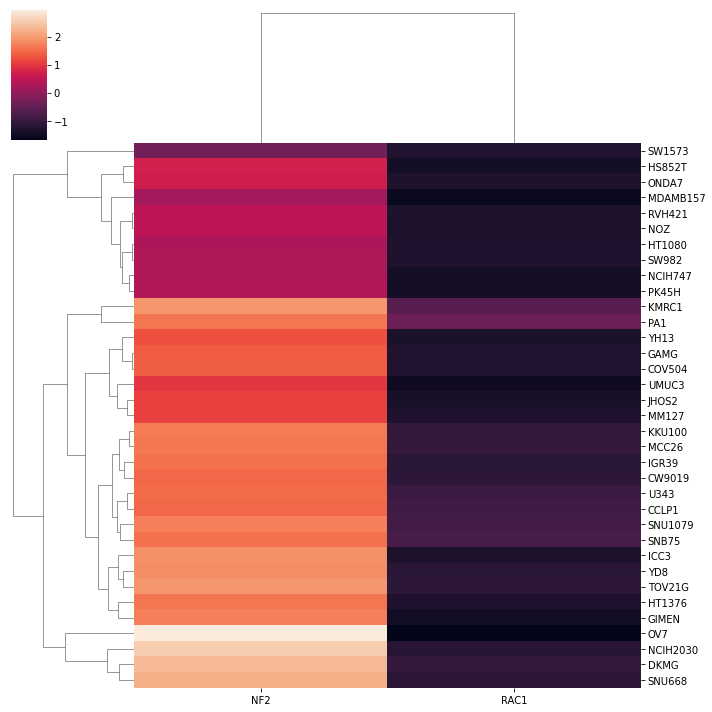

In [48]:
import seaborn as sns
dataz = allGenes[['NF2','RAC1']]

a = top_cellines['NF2_RAC1']

datay = dataz.index.isin(a)

datay = dataz[datay]
g = sns.clustermap(datay)
g.savefig('/home/annerer/Dokumente/clustermap_NF2_RAC1')
#plt.title('A')
#lut = dict(zip(prd.primary_disease, "rbg"))
#row_colors = datay.index.map(lut)

#g = sns.clustermap(datay, row_colors=row_colors)

In [51]:
prd

,primary_disease
35,Brain Cancer
53,Sarcoma
97,Brain Cancer
131,Ovarian Cancer
208,Bile Duct Cancer
243,Brain Cancer
273,Skin Cancer
343,Gastric Cancer
402,Colon/Colorectal Cancer
467,Pancreatic Cancer


Text(709.5999999999999, 0.5, 'Genes')

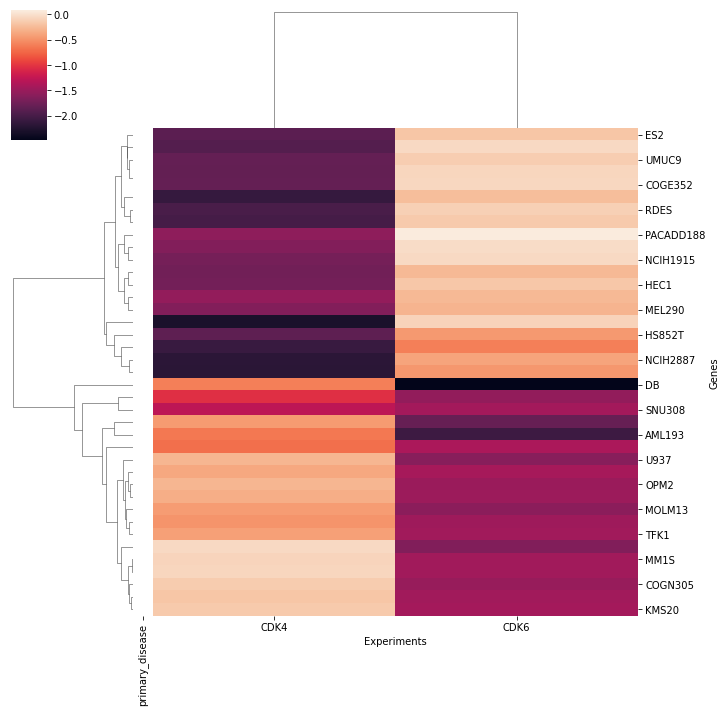

In [17]:
import seaborn as sns
dataz = allGenes[['CDK4','CDK6']]

a = top_cellines['CDK6_CDK4']

datay = dataz.index.isin(a)

datay = dataz[datay]
g = sns.clustermap(datay,row_colors=prd)
g.savefig('/home/annerer/Dokumente/clustermap_CDK6_CDK4')
g.ax_heatmap.set_xlabel('Experiments')
g.ax_heatmap.set_ylabel('Genes')
#row_colors=row_colors
# this should be possible if i combine the prd dataframe with the datay

In [50]:
datay.columns  # add to this dataframe the primary diseases. then use them to draw the correct figure
annotated_datay = pd.merge(datay,prd,on=datay.index.values)

KeyError: array(['HEL9217', 'OPM2', 'RDES', 'VCAP', 'SNU308', 'HCC2429', 'THP1',
       'NCIH2887', 'HS852T', 'HCC1419', 'EWS502', 'KARPAS422', 'DB',
       'NCIH3122', 'MOLM13', 'SUDHL4', 'U937', 'KMS20', 'NCIH1915',
       'IGR39', 'AML193', 'FU97', 'DMS53', 'MM1S', 'OCIMY5', 'NCIH1568',
       'MDAMB415', 'ES2', 'MDAMB453', 'COGE352', 'COGN305', 'PACADD188',
       'UMUC9', 'HEC1', 'HSC1', 'TFK1', 'SEMK2', 'SNU1544', 'MEL290'],
      dtype=object)

In [47]:
datay.columns

Index(['CDK4', 'CDK6'], dtype='object')

In [3]:
def pretty_gene_names(dataset):
    mapping = {}

    for i in np.arange(0,data.shape[0],1):
        mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

    dataset["INDEX"] = dataset.DepMap_ID
    dataset = dataset.set_index('INDEX')
    dataset = dataset.rename(index=mapping)

    # "DepMap_ID
    dataset = dataset.drop("DepMap_ID",1)

    gene = dataset.columns.to_list()
    # split at space
    for i in range(len(gene)):
        gene[i] = gene[i].split(" ") 

    genes = []
    for i in range(len(gene)):
        genes.append(gene[i][0])
    
    dataset.columns = genes
    return dataset

In [4]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes


cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1


a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c
allGenes = effect[effect.columns.intersection(cellL)]

765
1781
765


In [5]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117
